<a href="https://colab.research.google.com/github/Max030711/Sentiment-Analysis/blob/main/sentiment_analysis_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
# configuring the path of Kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!kaggle datasets download -d mdismielhossenabir/sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis
License(s): MIT
  0% 0.00/14.3k [00:00<?, ?B/s]
100% 14.3k/14.3k [00:00<00:00, 18.4MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/sentiment-analysis.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [21]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('/content/sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [4]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [5]:
df.shape

(499, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [7]:
df.sentiment.value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

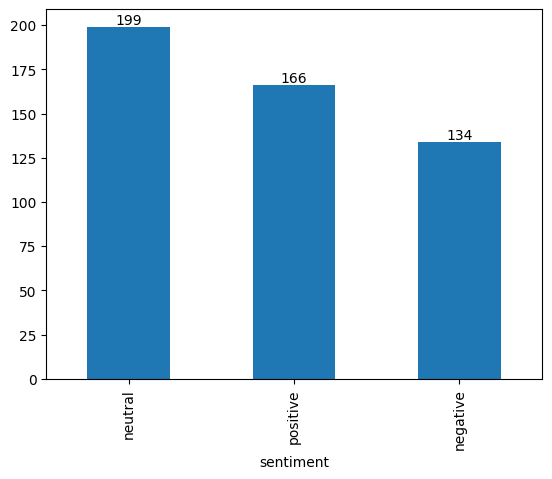

In [8]:
# df.sentiment.value_counts().plot(kind='bar')
# plt.show()
df.sentiment.value_counts().plot(kind='bar')

# Adding data labels
counts = df.sentiment.value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [9]:
def mapping(x):
  map = {
      'positive': 1,
      'neutral': 0,
      'negative': -1
  }
  return map.get(x)

In [10]:
  df['sentiment'] = df['sentiment'].apply(mapping)
  df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,night,Don't angry me,-1,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,-1,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",-1,Instagram


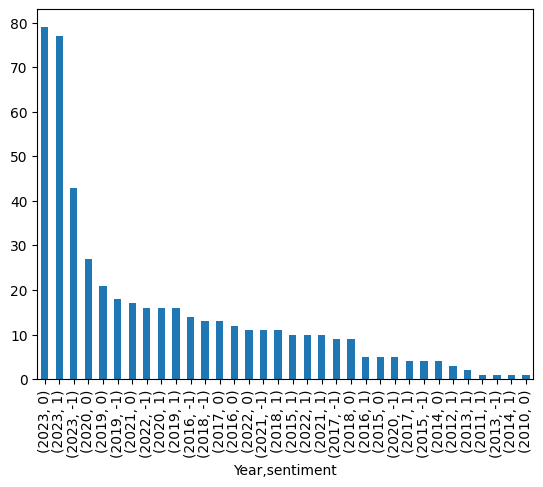

In [11]:
df.groupby('Year').sentiment.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

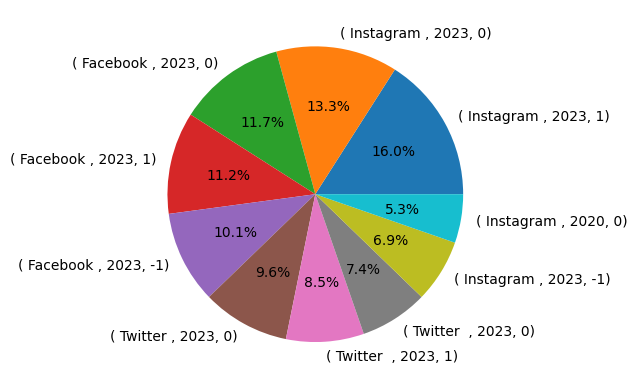

In [12]:
df.groupby(['Platform','Year']).sentiment.value_counts().sort_values(ascending = False).head(10).plot(kind = 'pie',autopct = '%1.1f%%',ylabel='')
plt.show()

In [13]:
df['Time of Tweet'].value_counts()

Time of Tweet
morning    171
noon       167
night      161
Name: count, dtype: int64

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [14]:
ps = PorterStemmer()

In [19]:

df['text'] = df['text'].apply(stemming)

In [20]:
total_word_count = 0
for content in df['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

3064


In [22]:
X = df['text']
Y = df['sentiment']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [24]:
#vectorization
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

In [26]:
model = SVC()
model.fit(X_train, Y_train)

# Make predictions
Y_pred_cls = model.predict(X_test)

accuracy_cls = accuracy_score(Y_test, Y_pred_cls)

f1_cls = f1_score(Y_test, Y_pred_cls, average='weighted')

report_cls = classification_report(Y_test, Y_pred_cls)

# Print the results for classification
print(f"Model: SVM")
print(f"Accuracy: {accuracy_cls:.4f}")
print(f"F1-Score: {f1_cls:.4f}")
print(f"Classification Report:\n{report_cls}")
print("="*50)

Model: SVM
Accuracy: 0.6700
F1-Score: 0.6430
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.26      0.41        27
           0       0.56      0.95      0.70        40
           1       0.88      0.67      0.76        33

    accuracy                           0.67       100
   macro avg       0.81      0.63      0.62       100
weighted avg       0.78      0.67      0.64       100



In [27]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        -1:'negative'
     }
    return category_map.get(val,-1)

In [28]:
def make_predictions(text):
    text = stemming(text)
    text = vc.transform([text])
    val = model.predict(text)
    val = val_to_category(int(val[0]))
    print("sentiment is : ",val)

In [29]:
make_predictions("I am happy")

sentiment is :  positive


In [30]:
make_predictions("I am going to study")

sentiment is :  neutral


In [31]:
make_predictions("I am angry")

sentiment is :  negative
